In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
data=pd.read_csv("placement_data.csv")
data.head()

,Year,Job role offered,Compamies,Student_placed,Highest_Package
0,2010,SDE,220,150,5.8
1,2011,SDE,240,165,6.4
2,2012,Developer,260,180,7.1
3,2013,Data Analyst,300,210,8.3
4,2014,Developer,350,260,9.2


In [64]:
X = data[['Year', 'Compamies', 'Student_placed'] + 
         [col for col in data.columns if 'Job role offered_' in col]]
y = data['Highest_Package']


In [65]:
data = data.dropna()
# Convert categorical columns using one-hot encoding
data = pd.get_dummies(data, columns=['Job role offered'], drop_first=True)



In [66]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [67]:
normalizer=layers.Normalization()
normalizer.adapt(np.array(train_features))

In [68]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss = 'mean_absolute_error')

In [70]:
history = model.fit(
    train_features, train_labels,
    epochs = 100,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 22.2998 - val_loss: 10.2371
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 22.2491 - val_loss: 10.2017
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 22.1991 - val_loss: 10.1656
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 22.1489 - val_loss: 10.1308
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 22.0999 - val_loss: 10.0963
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 22.0515 - val_loss: 10.0617
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 22.0029 - val_loss: 10.0270
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 21.9546 - val_loss: 9.9921
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 21.9063 - val_loss: 9.9569
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 21.8579 - val_loss: 9.9215
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 21.8095 - val_loss: 9.8858
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/s

In [71]:
test_results = model.evaluate(test_features, test_labels, verbose = 0)
print("Test MAE:", test_results)

Test MAE: 10.367660522460938


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


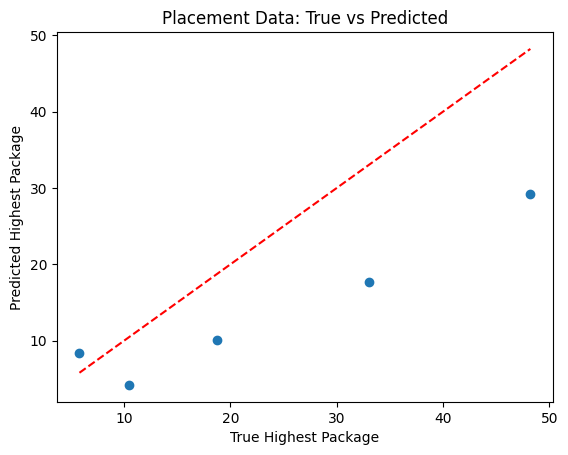

In [72]:
predictions = model.predict(test_features).flatten()

plt.scatter(test_labels, predictions)
plt.plot(
    [min(test_labels), max(test_labels)],
    [min(test_labels), max(test_labels)],
    'r--'
)
plt.xlabel('True Highest Package')
plt.ylabel('Predicted Highest Package')
plt.title('Placement Data: True vs Predicted')
plt.show()
